**INDIHOME SENTIMENT ANALYSIS**

Indihome sentiment analysis aims to understand how indihome product performs in the customer's sight. We will look deeper into how society values indihome product.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import accuracy_score
from google.colab import drive
from spacy.lang.id.stop_words import STOP_WORDS
import nltk
from nltk import word_tokenize
import plotly.express as px
from sklearn.utils import shuffle
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from sklearn import svm

In [ ]:
pip install Wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dataset = pd.read_csv('/content/datasetindihome_old.txt', sep = '\t', encoding = 'latin')

In [ ]:
dataset = shuffle(dataset)

This dataset has 981 data and contains labels which indicate that the data is negative, neutral, or positive. 

In [ ]:
dataset['Label'] = [str.lower(entry) for entry in dataset['Label']] #Lower the label to become 'positive', 'neutral', 'negative'

In [ ]:
dataset.Label.value_counts()

negative    685
netral      208
positive     88
Name: Label, dtype: int64

**Data Visualization**

We then try to create visualization of how many labels that exist in the entire dataset.

In [ ]:
fig = px.pie(dataset, names='Label', title='Dataset Label')
fig.show()

The label visualization shows that there are lots more of negative labels than neutral or positive labels. It can be sign that Indihome product needs improvement, since many people dislike this product.

In [ ]:
label = {'positive':1, 'netral':0, 'negative': 2}
dataset['Label'] = dataset['Label'].map(label)
# dataset = dataset.loc[dataset['Label'].isin(['positive', 'negative'])]
# dataset['Label'] = np.where(dataset['Label'].str.contains('positive'),1,0)

We map the label to become numbers thus it is interpretable by the machine learning model

In [ ]:
dataset

,text,Label
29,? ?? after realizing this week end ep ep ...,2
451,Kak Indra. Maaf ya jadi bikin Kakak ga nyaman....,2
694,? ??heh ezraa gemblung ngawur banget mention i...,0
169,? ??emang minggu kali ganggu internet gabisa d...,2
395,Ini indihome lagi gangguan ya??,2
...,...,...
690,? ??follow instagram indihome foto tema versi ...,0
471,"indihome sangat menguji kesabaran anjae, dari ...",2
722,? ??lagi nunggu imsak nyari tiket kereta api d...,0
855,? ??kak fajar hans koordinasi anjur aktif nada...,0


In [ ]:
import urllib.parse
import urllib.request
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 27.7 MB/s 


Sastrawi is used for text analysis in Bahasa Indonesia

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

In [ ]:
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword = nltk.corpus.stopwords.words('indonesian')

In [ ]:
def textprocessing(text):
  text = re.sub(r"[^a-zA-Z0-9 ]"," ",text) #removing any other icons or emoji, and other thing other than alphabets and numerics
  text = str.lower(text) # lowering the text so it does not produce different meaning between upper alphabet and lower one. 
  # text = [word for word in text if word not in stopword]
  text = stemmer.stem(text) # Stemmer is used for reducing the inflection in words to their root forms
  words = word_tokenize(text) # Tokenize is used to separate each word so it can be encoded into numerical form.
  newtext = ''
  for w in words:
    if not w.startswith("#"): # Removing any words starting with #
      if not w.startswith("@"): # Removing any words starting with @
        if w.isalpha:
          if w not in STOP_WORDS:
            newtext = newtext + " " + w
  return newtext

In [ ]:
nltk.download('punkt')
word_tokenize(dataset['text'][900])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['?',
 '?',
 '?',
 'ga',
 'ragu',
 'pake',
 'indihome',
 'jaring',
 'stabil',
 'kencang',
 'jamin',
 'giat',
 'rumah',
 'aman',
 'kendali']

In [ ]:
dataset['text'] 

29     ? ??   after realizing this week end ep ep    ...
451    Kak Indra. Maaf ya jadi bikin Kakak ga nyaman....
694    ? ??heh ezraa gemblung ngawur banget mention i...
169    ? ??emang minggu kali ganggu internet gabisa d...
395                      Ini indihome lagi gangguan ya??
                             ...                        
690    ? ??follow instagram indihome foto tema versi ...
471    indihome sangat menguji kesabaran anjae, dari ...
722    ? ??lagi nunggu imsak nyari tiket kereta api d...
855    ? ??kak fajar hans koordinasi anjur aktif nada...
564                            Wifi indihome jelek bgttt
Name: text, Length: 981, dtype: object

In [ ]:
# dataset = dataset[['text', 'Label']]
dataset['text'] = dataset['text'].apply(textprocessing)
dataset['text']

29                   after realizing this week end ep ep
451     kak indra maaf ya bikin kakak ga nyaman adip ...
694     heh ezraa gemblung ngawur banget mention indi...
169     emang minggu kali ganggu internet gabisa dipa...
395                                   indihome ganggu ya
                             ...                        
690     follow instagram indihome foto tema versi sob...
471     indihome uji sabar anjae kemaren ganggu mulu ...
722     nunggu imsak nyari tiket kereta api deh mudik...
855     kak fajar hans koordinasi anjur aktif nada de...
564                            wifi indihome jelek bgttt
Name: text, Length: 981, dtype: object

Applying textprocessing, including remove emojis, lower text, stemming, tokenize, and etc

In [ ]:
xx = dataset[dataset['Label']==1]

In [ ]:
yy = dataset[dataset['Label']==0]

In [ ]:
zz = dataset[dataset['Label']==2]

In [ ]:
a = ''
for i in xx['text']:
  a = a + i

b = ''
for i in yy['text']:
  b = b + i

c = ''
for i in zz['text']:
  c = c + i

Visualizing the most frequent words which appear in the entire dataset. First for the positive reviews, followed by neutral and negative reviews.

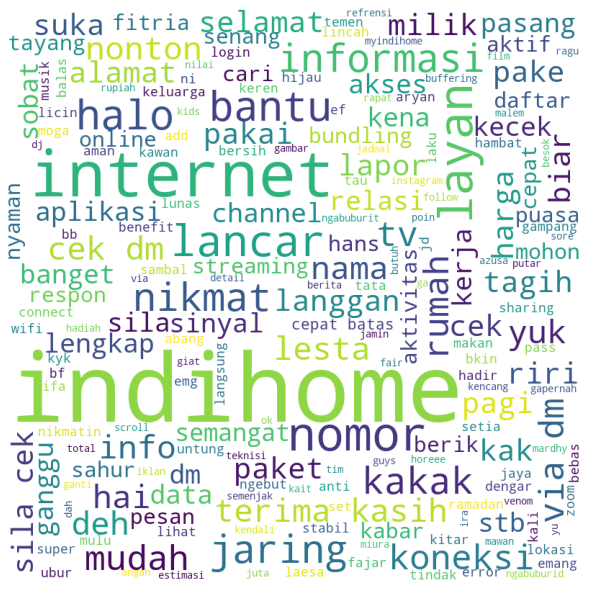

In [ ]:
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(a)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

The most frequent word that appears in positive sentiment is Indihome, internet, and nomor. It means if our sentence contains one of these words, chances are it will be classified as positive sentiment. This is followed by several positive words like terima kasih, nikmat, lancar, and so on. Since this class is the minority, thus we can not expect to gather much information about this class


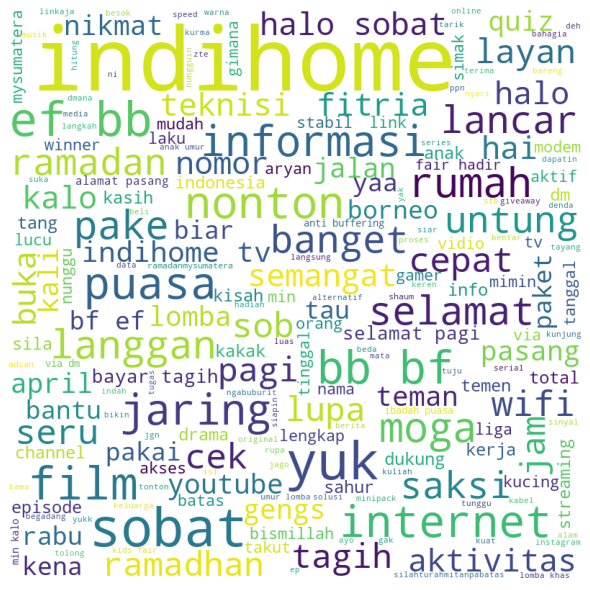

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(b)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

The most frequent words that appear in neutral sentiment are indihome, internet, sobat, yuk, and followed by puasa, ramadan, tagih, pagi and many more. It gives us notion that most people with neutral sentiment will be inclined to tell stories, or ask for giveaway,rather than to complain or to compliment.

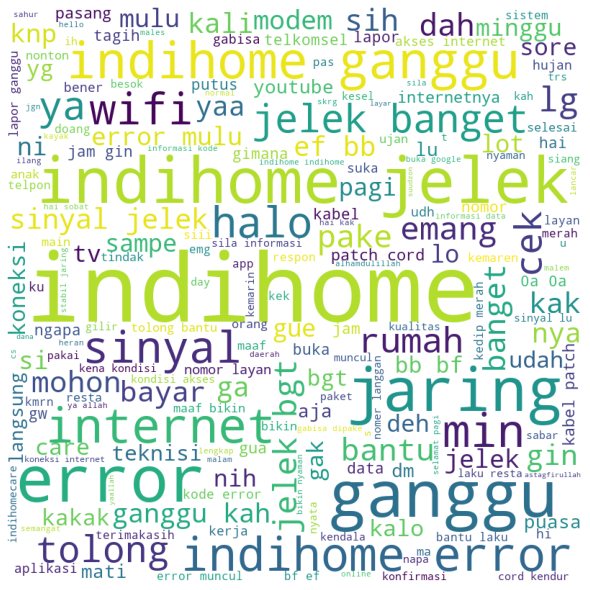

In [ ]:
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(c)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

And this is the part in which Indihome should pay attention to, the most frequent words are indihome, ganggu, error, sinyal jelek, error and many more. It could be concluded that Indihome has issues in signalling, so many people compalin about that.

**Machine Learning Model**

In this section, we are going to deep dive about how our ML model performs for specific task, in this case is sentiment analysis. We will use traditional method first which are KNN and Multinomial Naive Bayes.

First, is splitting the data 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset['text'], dataset['Label'],test_size = 0.25, stratify = dataset['Label'])

In [ ]:
x_train

1                                 misi iji piki indihimi
355                kalo indihome error resta modem sabar
96                       gua kmrn tweet indihome ngilang
354                                       indihome error
561     indihome jelek banget ngabuburit enak maratho...
                             ...                        
830                 min kalo luas jangkuan wifi indihome
233                     umpaj indihome jelek hgt lh nntn
783                                daftar yaa sob borneo
766     hai iqbal informasi detail lapor nomor intern...
670     halo halo indihome sabar ku habis minggu loo ...
Name: text, Length: 735, dtype: object

Secondly, preprocess the data, by using TFIDF vectorizer, it is like counting how many words that appear and transform it using TF-IDF. There are several parameters, min_df means ignoring the words that occur less than 5 documents, max_df means ignoring the words that appear more than 80% of the document, sublinear_tf is applying the tf scaling, ngram_range means to vectorize one to bigram. 

In [ ]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             ngram_range = (1,2),
                             use_idf = True)
vectorizer.fit_transform(dataset['text'])
x_train_tfidf = vectorizer.transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

Applying Grid Search CV to perform hyperparameter tuning in k-Nearest Neighbors

In [ ]:
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15,17],
    'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# defining parameter range
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv = 5)
grid_SVC = grid.fit(x_train_tfidf, y_train)

In [ ]:
predictions_svc= grid_SVC.predict(x_test_tfidf)
accuracy_score(predictions_svc, y_test)

0.7967479674796748

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
# clf = KNN(n_neighbors = 3, algorithm = 'auto')
# clf.fit(x_train_tfidf, y_train)
gs = GridSearchCV(KNN(), grid_params, verbose = 1, cv=5, n_jobs = -1)
# fit the model on our train set
g_res = gs.fit(x_train_tfidf, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


The best parameters are metric is minkowski, the number of neighbors is 17, and the weights is distance

In [ ]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 17, 'weights': 'distance'}

In [ ]:
predictions_clf = g_res.predict(x_test_tfidf)

The accuracy is seemingly pretty good but we have to investigate it first using confusion matrix later

In [ ]:
accuracy_score(predictions_clf, y_test)

0.8170731707317073

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

I add SMOTE in the pipeline, so it can better the model generalization and I decide to utilise Multinomial Naive Bayes to perform model prediction

In [ ]:
textclassifier =Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=123424)),
   ('mnb',MultinomialNB())
])

In [ ]:
textclassifier.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('smote', SMOTE(random_state=123424)),
                ('mnb', MultinomialNB())])

In [ ]:
y_predicted = textclassifier.predict(x_test)

The accuracy score is nearly as good as kNN it reaches 75% without any hyperparameter tuning.

In [ ]:
accuracy_score(y_test,y_predicted )

0.8373983739837398

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Deep Learning Model**

Use deep learning model to better the performance of our ML model. The procedure is literally the same, but it is slightly different to create the features. If our ML models use TF-IDF then in DL model uses tokenizing and padding sequences.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Dropout, Embedding
from sklearn.utils import shuffle

In [ ]:
dataset

,text,Label
29,after realizing this week end ep ep,2
451,kak indra maaf ya bikin kakak ga nyaman adip ...,2
694,heh ezraa gemblung ngawur banget mention indi...,0
169,emang minggu kali ganggu internet gabisa dipa...,2
395,indihome ganggu ya,2
...,...,...
690,follow instagram indihome foto tema versi sob...,0
471,indihome uji sabar anjae kemaren ganggu mulu ...,2
722,nunggu imsak nyari tiket kereta api deh mudik...,0
855,kak fajar hans koordinasi anjur aktif nada de...,0


In [ ]:
data_text = dataset.text.values

In [ ]:
tokenizer = Tokenizer(num_words = 5000)

In [ ]:
tokenizer.fit_on_texts(data_text)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

2023

We transform our words into numerical representation using texts_to_sequence, and use padding to make our vector representation lenghts are equal

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(data_text)

In [ ]:
padded_sequence = pad_sequences(encoded_docs, maxlen = 200) 

In [ ]:
padded_sequence

array([[   0,    0,    0, ...,  456,  331,  331],
       [   0,    0,    0, ...,  143,   56,  611],
       [   0,    0,    0, ..., 1129,   69,    1],
       ...,
       [   0,    0,    0, ...,    6,   74,  120],
       [   0,    0,    0, ...,  190,  159,  114],
       [   0,    0,    0, ...,    1,    2,  416]], dtype=int32)

In [ ]:
import tensorflow as tf

In [ ]:
depth = 3
y= tf.one_hot(dataset['Label'], depth)

In [ ]:
pad_train = padded_sequence[:735]
pad_test = padded_sequence[735:]
y_train_nn = y[:735]
y_test_nn = y[735:]
print(len(pad_train), len(pad_test))

735 246


We use embedding layer which enables us to find the relationship between words that is difficult to capture. Spatial dropout here means to drop one feature at random to reduce the chance of overfitting.

In [ ]:
embedding_vector_length = 64
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length = 200))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(50, dropout = 0.5, recurrent_dropout=0.5))
model.add(Dropout(0.25))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()
# model.add(Dropout((0.25)))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           129472    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 64)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                23000     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 152,625
Trainable params: 152,625
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(pad_train, y_train_nn,validation_data = [pad_test, y_test_nn],epochs = 8, batch_size = 32 )

Epoch 1/8
23/23 [==============================] - 42s 2s/step - loss: 0.9356 - accuracy: 0.6721 - val_loss: 0.8391 - val_accuracy: 0.6504
Epoch 2/8
23/23 [==============================] - 18s 796ms/step - loss: 0.7283 - accuracy: 0.7143 - val_loss: 0.7881 - val_accuracy: 0.6504
Epoch 3/8
23/23 [==============================] - 19s 820ms/step - loss: 0.6747 - accuracy: 0.7211 - val_loss: 0.7268 - val_accuracy: 0.6992
Epoch 4/8
23/23 [==============================] - 19s 809ms/step - loss: 0.5816 - accuracy: 0.7823 - val_loss: 0.6741 - val_accuracy: 0.7033
Epoch 5/8
23/23 [==============================] - 21s 933ms/step - loss: 0.4550 - accuracy: 0.8422 - val_loss: 0.5509 - val_accuracy: 0.7683
Epoch 6/8
23/23 [==============================] - 19s 819ms/step - loss: 0.3408 - accuracy: 0.8912 - val_loss: 0.5196 - val_accuracy: 0.7805
Epoch 7/8
23/23 [==============================] - 19s 817ms/step - loss: 0.2853 - accuracy: 0.8925 - val_loss: 0.5085 - val_accuracy: 0.8008
Epoch 8/8

The loss goes down as the epcohs increase

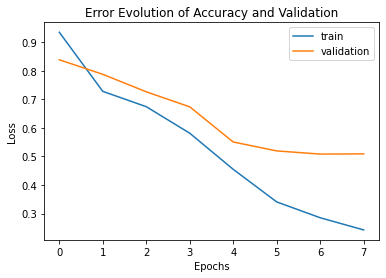

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Error Evolution of Accuracy and Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

The accuracy is higher as the epochs increase

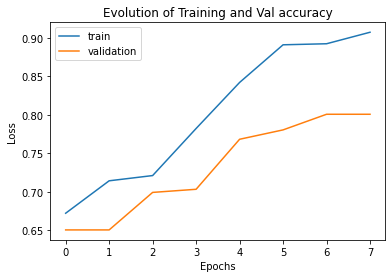

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Evolution of Training and Val accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        52
           1       0.55      0.38      0.44        32
           2       0.90      0.96      0.93       162

    accuracy                           0.84       246
   macro avg       0.73      0.69      0.71       246
weighted avg       0.82      0.84      0.83       246



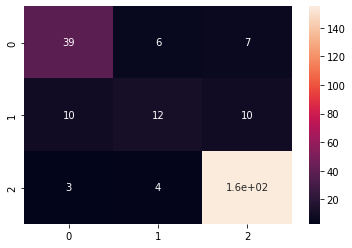

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
y_pred_pipe = textclassifier.predict(x_test)
sns.heatmap(confusion_matrix(y_pred_pipe, y_test), annot = True)
print(classification_report(y_pred_pipe, y_test))

KNN

              precision    recall  f1-score   support

           0       0.88      0.57      0.70        80
           1       0.00      0.00      0.00         1
           2       0.90      0.94      0.92       165

    accuracy                           0.82       246
   macro avg       0.60      0.50      0.54       246
weighted avg       0.89      0.82      0.84       246



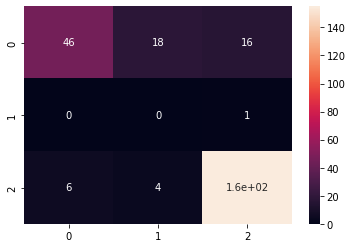

In [ ]:
test_text_tfidf = vectorizer.transform(x_test)
y_pred_clf = g_res.predict(test_text_tfidf)
sns.heatmap(confusion_matrix(y_pred_clf, y_test), annot = True)
print(classification_report(y_pred_clf, y_test))

SVC

              precision    recall  f1-score   support

           0       0.56      0.66      0.60        44
           1       0.05      0.33      0.08         3
           2       0.97      0.83      0.89       199

    accuracy                           0.80       246
   macro avg       0.52      0.61      0.53       246
weighted avg       0.88      0.80      0.83       246



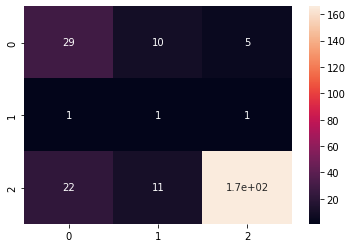

In [ ]:
y_pred_clf_SVC = grid_SVC.predict(test_text_tfidf)
sns.heatmap(confusion_matrix(y_pred_clf_SVC, y_test), annot = True)
print(classification_report(y_pred_clf_SVC, y_test))

Neural Network

              precision    recall  f1-score   support

           0       0.94      0.69      0.80        71
           1       0.00      0.00      0.00         0
           2       0.98      0.96      0.97       175

    accuracy                           0.88       246
   macro avg       0.64      0.55      0.59       246
weighted avg       0.97      0.88      0.92       246



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



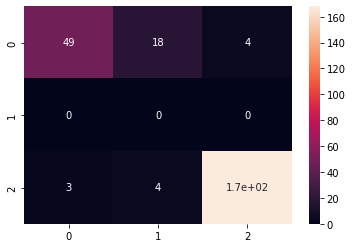

In [ ]:
enc = tokenizer.texts_to_sequences(x_test)
pad = pad_sequences(enc,maxlen = 200) 
y_pred_nn = model.predict(pad)
y_pred_nn = np.argmax(y_pred_nn, axis = 1)
sns.heatmap(confusion_matrix(y_pred_nn, y_test), annot = True)
print(classification_report(y_pred_nn, y_test))

Model selection is considered using accuracy, and F1-score.
As the figure shows, 0.89 in deep learning model accuracy seems to be decent. However, the model could not predict class 1. In this case, we would prefer to have Multinomial NB as our model selection, since even if its accuracy is not as superior as KNN with hyperparameter tuning, but it could predict class 1 much better than other models, and has 0.92 F1 score in predicting class 2 similar to KNN's

In [ ]:
sentence = 'indihome internet cepat'
text_test = pd.DataFrame([sentence])
text_test = text_test[0].apply(textprocessing)
textclassifier.predict(text_test)

array([1])

In [ ]:
test_text_tfidf = vectorizer.transform(text_test)
g_res.predict(test_text_tfidf)

array([0])

In [ ]:
test_text_tfidf = vectorizer.transform(text_test)
g_res.predict(test_text_tfidf)

array([0])

In [ ]:
enc = tokenizer.texts_to_sequences(text_test)
pad = pad_sequences(enc,maxlen = 200) 
y = model.predict(pad)
y = np.argmax(y, axis = 1)
y

array([0])

It is a proof that our chosen model could perform much better in predicting class 1 or positive sentiment rather than the other models.